<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [19]:
# Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Estilo dos gráficos
sns.set(style="darkgrid")

# Carregamento do dataset
df = pd.read_csv("netflix_data.csv")

# Entendendo melhor o Dataset(EDA)

Total de filmes da década de 1990: 183

Valores nulos por coluna:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

Estatísticas de duração:
count    183.000000
mean     115.120219
std       33.201959
min       28.000000
25%       94.000000
50%      108.000000
75%      136.000000
max      195.000000
Name: duration, dtype: float64


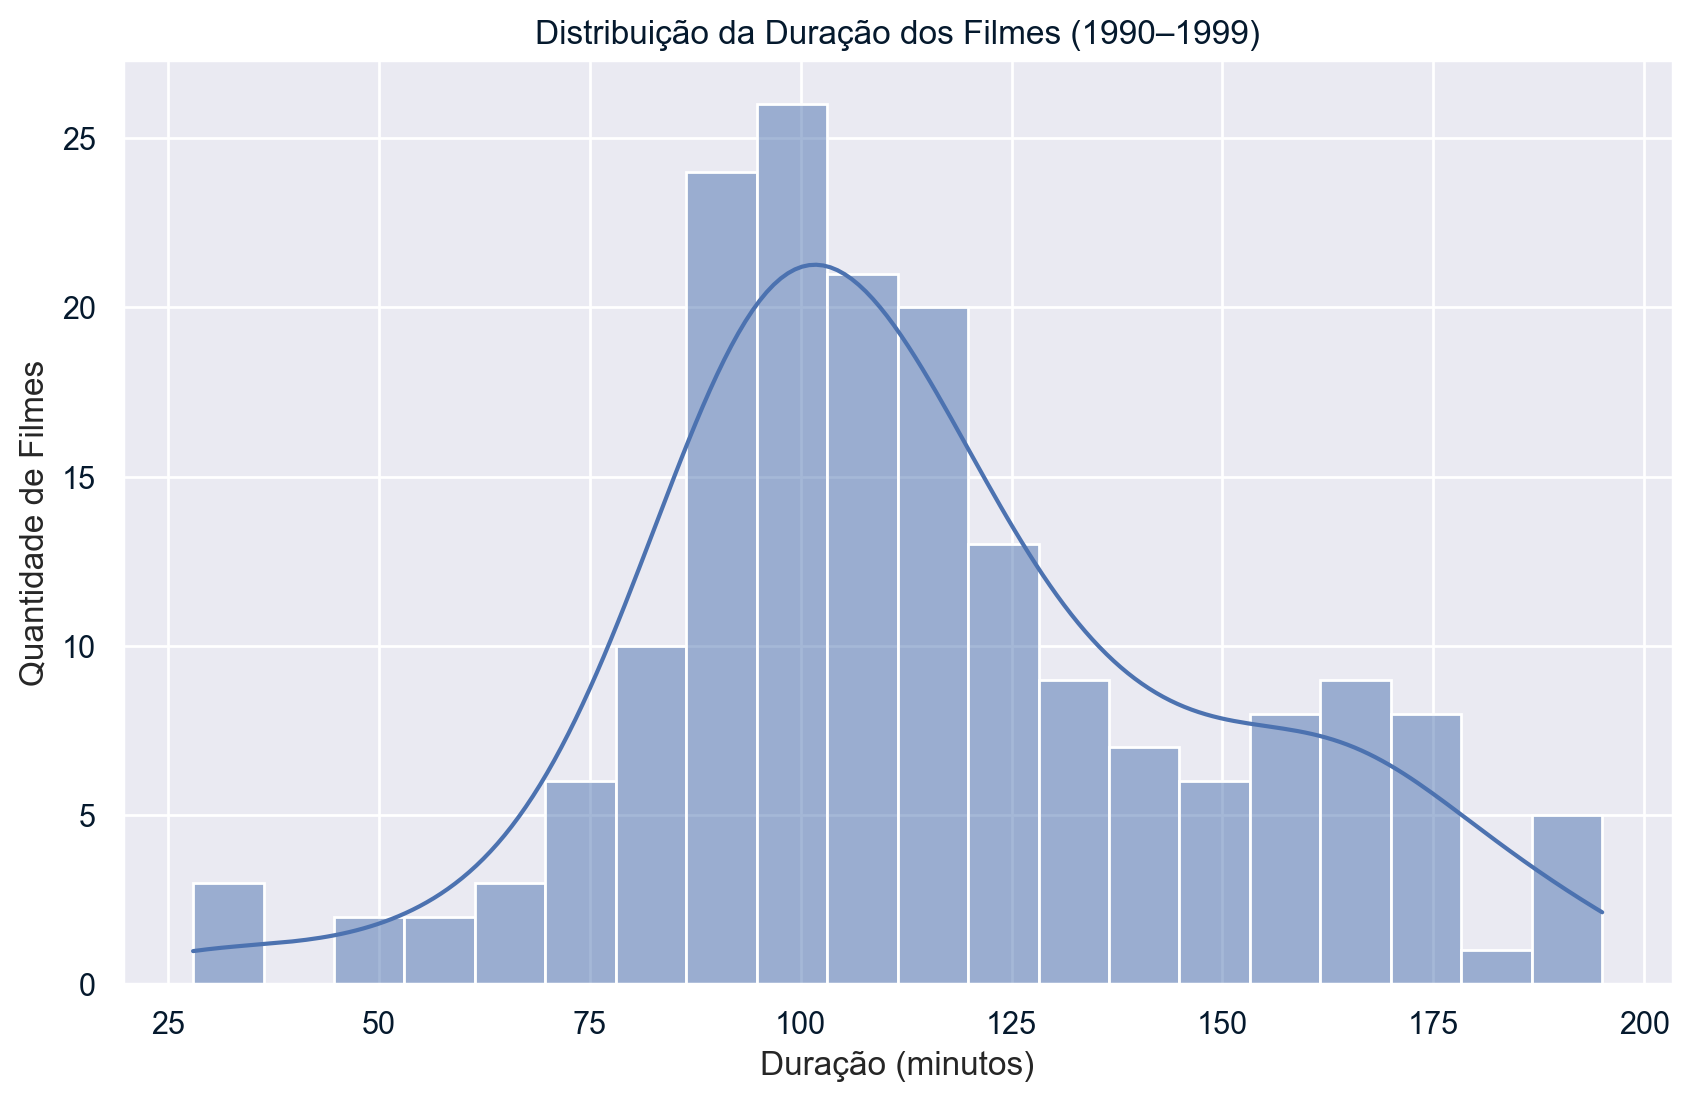

In [21]:
# Quantidade de filmes da década de 1990
print("Total de filmes da década de 1990:", len(df_90s))

# Verificar dados ausentes
print("\nValores nulos por coluna:")
print(df_90s.isnull().sum())

# Estatísticas gerais de duração
print("\nEstatísticas de duração:")
print(df_90s['duration'].describe())

# Histograma da duração dos filmes
plt.figure(figsize=(10, 6))
sns.histplot(df_90s['duration'], bins=20, kde=True)
plt.title('Distribuição da Duração dos Filmes (1990–1999)')
plt.xlabel('Duração (minutos)')
plt.ylabel('Quantidade de Filmes')
plt.show()

# Resolvendo as questões

In [22]:
# Filtrar apenas os registros do tipo "Movie"
df_movies = df[df['type'] == 'Movie'].copy()

# Converter a coluna 'duration' para número (minutos)
# Alguns valores podem ser nulos ou não estarem no formato esperado
df_movies['duration'] = df_movies['duration'].astype(str).str.replace(' min', '', regex=False)
df_movies['duration'] = pd.to_numeric(df_movies['duration'], errors='coerce')

# Filtrar os filmes lançados entre 1990 e 1999
df_90s = df_movies[(df_movies['release_year'] >= 1990) & (df_movies['release_year'] <= 1999)].copy()


# Resposta 1: Duração mais frequente
Utilizarei `.mode()` para obter a moda do dataset.

In [25]:
# Descobrir a duração mais frequente dos filmes nos anos 90
duration = int(df_90s['duration'].mode()[0])
print("🎬 Duração mais frequente dos filmes dos anos 1990:", duration, "minutos")

🎬 Duração mais frequente dos filmes dos anos 1990: 94 minutos


# Resposta 2: Filmes de Ação com menos de 90 minutos

In [24]:
# Filtrar filmes de ação com menos de 90 minutos
short_action_movies = df_90s[
    (df_90s['duration'] < 90) &
    (df_90s['genre'].str.contains("Action", case=False, na=False))
]

# Contagem dos filmes encontrados
short_movie_count = short_action_movies.shape[0]
print("🔥 Quantidade de filmes de ação com menos de 90 minutos (1990s):", short_movie_count)


🔥 Quantidade de filmes de ação com menos de 90 minutos (1990s): 7


# **Resultados**: 

🎬 Duração mais frequente: 94 minutos
Isso indica que a maior parte dos filmes lançados na década de 1990 no catálogo da Netflix tem cerca de 1h34min. Esse tempo é clássico para filmes de sessão da tarde ou cinema tradicional da época, curto o suficiente para manter o ritmo, mas longo o suficiente para desenvolver uma boa trama.

🔥 Quantidade de filmes de ação com menos de 90 minutos: 7 filmes
Esse número sugere que filmes de ação dos anos 90 com curta duração eram menos comuns, provavelmente porque o gênero exige mais tempo para desenvolver cenas de luta, perseguições e enredos mais elaborados.

✅ Análise resumida para colocar no relatório/apresentação:
Na década de 1990, os filmes da Netflix tendem a ter cerca de 94 minutos de duração, indicando uma preferência por obras de tempo intermediário.

Filmes de ação com menos de 90 minutos são raros, com apenas 7 registros, o que evidencia que produções mais rápidas não eram padrão para esse gênero.

